#Final Exam
นาย ปพนธ์ ชุณหคล้าย 6210503691

In [ ]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-fs-prebuilt' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'


In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2

--2022-04-10 12:58:32--  https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.19.142
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 [following]
--2022-04-10 12:58:33--  https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb?ruKS1mYZpysneK5PKbjBabINWkDwGY1yacVbEHhTMpkLmFapbOGORY4hm2lX9uRbyjSBZ0sVPSkHQXRZKkgUVBAZFyDn0sO8fp3-4b0x-pFSC

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Wed_Apr_11_23:16:29_CDT_2018
Cuda compilation tools, release 9.2, V9.2.88


In [ ]:
!pip install  git+https://github.com/andreinechaev/nvcc4jupyter.git

  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-7h0ndllr
  Running command git clone -q https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-7h0ndllr
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4306 sha256=5e924fc5e04e21338ae87c26ebe1c018e045c0e8ec8ae1af04dab2994b5a3ab1
  Stored in directory: /tmp/pip-ephem-wheel-cache-atzsul3d/wheels/ca/33/8d/3c86eb85e97d2b6169d95c6e8f2c297fdec60db6e84cb56f5e
Successfully built NVCCPlugin


In [ ]:
!apt list --installed

Listing... Done
adduser/bionic,now 3.116ubuntu1 all [installed]
adwaita-icon-theme/bionic,now 3.28.0-1ubuntu1 all [installed,automatic]
apt/bionic-updates,now 1.6.14 amd64 [installed]
apt-utils/bionic-updates,now 1.6.14 amd64 [installed]
base-files/now 10.1ubuntu2.10 amd64 [installed,upgradable to: 10.1ubuntu2.11]
base-passwd/bionic,now 3.5.44 amd64 [installed]
bash/bionic-updates,now 4.4.18-2ubuntu1.2 amd64 [installed]
binutils/now 2.30-21ubuntu1~18.04.4 amd64 [installed,upgradable to: 2.30-21ubuntu1~18.04.7]
binutils-common/now 2.30-21ubuntu1~18.04.4 amd64 [installed,upgradable to: 2.30-21ubuntu1~18.04.7]
binutils-x86-64-linux-gnu/now 2.30-21ubuntu1~18.04.4 amd64 [installed,upgradable to: 2.30-21ubuntu1~18.04.7]
blt/bionic,now 2.5.3+dfsg-4 amd64 [installed,automatic]
bsdmainutils/bionic,now 11.1.2ubuntu1 amd64 [installed,automatic]
bsdutils/bionic-updates,bionic-security,now 1:2.31.1-0.4ubuntu3.7 amd64 [installed]
build-essential/bionic,now 12.4ubuntu1 amd64 [installed]
bzip2/bionic-

In [ ]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


In [ ]:
%%cu
#include <iostream>
int main() {
    std::cout << "Hello world\n";
    return 0;
}

Hello world



In [ ]:
%%file test.c
#include <stdio.h>
#include <omp.h>

int main(int argc, char** argv){
    int thread_id;

    #pragma omp parallel private(thread_id)
    {
        thread_id = omp_get_thread_num();
        printf("Hello from process: %d\n", thread_id );
    }
    return 0;
}


Writing test.c


In [ ]:
%%script bash
export OMP_NUM_THREADS=4

gcc test.c -o test -fopenmp
./test

Hello from process: 1
Hello from process: 0
Hello from process: 2
Hello from process: 3


In [ ]:
%%file test_mpi.c

#include <mpi.h>
#include <stdio.h>

int main(int argc, char** argv) {
    // Initialize the MPI environment
    MPI_Init(NULL, NULL);

    // Get the number of processes
    int world_size;
    MPI_Comm_size(MPI_COMM_WORLD, &world_size);

    // Get the rank of the process
    int world_rank;
    MPI_Comm_rank(MPI_COMM_WORLD, &world_rank);

    // Get the name of the processor
    char processor_name[MPI_MAX_PROCESSOR_NAME];
    int name_len;
    MPI_Get_processor_name(processor_name, &name_len);

    // Print off a hello world message
    printf("Hello world from processor %s, rank %d out of %d processors\n",
           processor_name, world_rank, world_size);

    // Finalize the MPI environment.
    MPI_Finalize();
}

Writing test_mpi.c


In [ ]:
%%script bash
mpicc test_mpi.c -o test_mpi    
mpirun --allow-run-as-root -np 4 ./test_mpi

Hello world from processor e630f6a05e88, rank 1 out of 4 processors
Hello world from processor e630f6a05e88, rank 3 out of 4 processors
Hello world from processor e630f6a05e88, rank 2 out of 4 processors
Hello world from processor e630f6a05e88, rank 0 out of 4 processors


The example is obtained from NVIDIA mooc:
 the Symmetric Iterative Feistel Cipher application that you will be refactoring.

# Application code



In [ ]:
%%file fie.cu

#include <iostream>
#include <fstream>
#include <cstdint>
#include <string>

#include <cstdint>
#include <assert.h>
 

uint64_t sdiv (uint64_t a, uint64_t b) {
    return (a+b-1)/b;
}

void check_last_error ( ) {

    cudaError_t err;
    if ((err = cudaGetLastError()) != cudaSuccess) {
        std::cout << "CUDA error: " << cudaGetErrorString(err) << " : "
                  << __FILE__ << ", line " << __LINE__ << std::endl;
            exit(1);
    }
}

bool encrypted_file_exists(const char * encrypted_file) {

    FILE *file;
    file = fopen(encrypted_file, "r");
    if (file) {
        fclose(file);
        return true;
    } else {
        return false;
    }
}

void write_encrypted_to_file(const char * encrypted_file, uint64_t * data, size_t size) {
    std::ofstream encrypted(encrypted_file, std::ios::binary);
    encrypted.write(reinterpret_cast<char*>(data), size);
    encrypted.close();
}

void read_encrypted_from_file(const char * encrypted_file, uint64_t * data, size_t size) {
    std::ifstream encrypted(encrypted_file, std::ios::binary);
    encrypted.read(reinterpret_cast<char*>(data), size);
    encrypted.close();
}

class Timer {

    float time;
    const uint64_t gpu;
    cudaEvent_t ying, yang;

public:

    Timer (uint64_t gpu=0) : gpu(gpu) {
        cudaSetDevice(gpu);
        cudaEventCreate(&ying);
        cudaEventCreate(&yang);
    }

    ~Timer ( ) {
        cudaSetDevice(gpu);
        cudaEventDestroy(ying);
        cudaEventDestroy(yang);
    }

    void start ( ) {
        cudaSetDevice(gpu);
        cudaEventRecord(ying, 0);
    }

    void stop (std::string label) {
        cudaSetDevice(gpu);
        cudaEventRecord(yang, 0);
        cudaEventSynchronize(yang);
        cudaEventElapsedTime(&time, ying, yang);
        std::cout << "TIMING: " << time << " ms (" << label << ")" << std::endl;
    }
};


__host__ __device__ __forceinline__
uint32_t hash (uint32_t x) {

        x ^= x >> 16;
        x *= 0x85ebca6b;
        x ^= x >> 13;
        x *= 0xc2b2ae35;
        x ^= x >> 16;

        return x;
}

__host__ __device__ __forceinline__
uint64_t permute64(uint64_t x, uint64_t num_iters) {

    constexpr uint64_t mask = (1UL << 32)-1;

    for (uint64_t iter = 0; iter < num_iters; iter++) {
        const uint64_t upper = x >> 32;
        const uint64_t lower = x & mask;
        const uint64_t mixer = hash(upper);

        x = upper + ((lower^mixer&mask) << 32);
    }

    return x;
}

__host__ __device__ __forceinline__
uint64_t unpermute64(uint64_t x, uint64_t num_iters) {

    constexpr uint64_t mask = (1UL << 32)-1;
    
    for (uint64_t iter = 0; iter < num_iters; iter++) {
        const uint64_t upper = x & mask;
        const uint64_t lower = x >> 32;
        const uint64_t mixer = hash(upper);

        x = (upper << 32) + (lower^mixer&mask);
    }

    return x;
}


 
void encrypt(uint64_t * data, uint64_t num_entries, 
                 uint64_t num_iters, bool parallel=true) {

   
    for (uint64_t entry = 0; entry < num_entries; entry++)
        // Permute each data entry the number of iterations and then write result to data.
        data[entry] = permute64(entry, num_iters);
}
 

void decrypt(uint64_t * data, uint64_t num_entries, 
                 uint64_t num_iters) {
     // thread_id = .......
     //change entry = 0 -> entry = thread_id
     for (uint64_t entry = 0; entry < num_entries; entry++)
        
        data[entry] = unpermute64(data[entry], num_iters);
}
 
bool check_result_cpu(uint64_t * data, uint64_t num_entries,
                      bool parallel=true) {

    uint64_t counter = 0;

    
    for (uint64_t entry = 0; entry < num_entries; entry++)
    
        // Because we created initial data values by ranging from 0 to N-1,
        // and because encrypting and decrypting is symmetrical,
        // then each data entry should be equal to `entry`.
        counter += data[entry] == entry;

    // True if all values have been correctly decrypted.
    return counter == num_entries;
}

int main (int argc, char * argv[]) {
    // This file will be used to cache encryption results
    // so we don't have to wait on the CPU every time.
    const char * encrypted_file = "./encrypted";

    // Timer instance to be used for sections of the application.
    Timer timer;
    
    // Timer instance to be used for total time on the GPU(s).
    Timer overall;

    const uint64_t num_entries = 1UL << 15; // 26;
    const uint64_t num_iters = 1UL << 5 ; //10;
    
    // Use all available CPUs in parallel for host calculations.
    const bool openmp = true;

    // This timer start and then stop pattern will be used throughout the application.
    timer.start();
    uint64_t * data_cpu;
    uint64_t * data_gpu;
	
     
	
	  data_cpu = (uint64_t *) malloc(sizeof(uint64_t)*num_entries);

    
	  
    timer.stop("allocate memory");
    check_last_error();

    timer.start();
    // If encryption cache file does not exist...
    if (!encrypted_file_exists(encrypted_file)) {
        // ...encrypt data in parallel on CPU...
        encrypt(data_cpu, num_entries, num_iters, openmp);
        // ...and make encryption cache file for later.
    write_encrypted_to_file(encrypted_file, data_cpu, sizeof(uint64_t)*num_entries);
    } else {
        // Use encryption cache file if it exists.
    read_encrypted_from_file(encrypted_file, data_cpu, sizeof(uint64_t)*num_entries);
    }
    timer.stop("encrypt data on CPU");

    // Begin timing for total time on GPU(s).
    overall.start();
    timer.start();
  
    
    check_last_error();

    timer.start();
   
    // Decrypt data on GPU(s)......
	
    decrypt(data_cpu, num_entries, num_iters);

    timer.stop("decrypt data on GPU");
    check_last_error();

    timer.start();

    // Copy data from GPU to CPU.
    // .....

    timer.stop("copy data from GPU to CPU");
    // Stop timer for total time on GPU(s).
    overall.stop("total time on GPU");
    check_last_error();

    timer.start();
    // Check results on CPU.
    const bool success = check_result_cpu(data_cpu, num_entries, openmp);
    std::cout << "STATUS: test " 
              << ( success ? "passed" : "failed")
              << std::endl;
    timer.stop("checking result on CPU");

    timer.start();
	
    // Free memory.
    free(data_cpu);
     


    timer.stop("free memory");
    check_last_error();
}


Writing fie.cu


In [ ]:
%%script bash
nvcc  -Xcompiler="-march=native -fopenmp" fie.cu -o fie
 ./fie

TIMING: 0.015008 ms (allocate memory)
TIMING: 24.1515 ms (encrypt data on CPU)
TIMING: 23.7458 ms (decrypt data on GPU)
TIMING: 0.002752 ms (copy data from GPU to CPU)
TIMING: 23.8092 ms (total time on GPU)
STATUS: test passed
TIMING: 0.113376 ms (checking result on CPU)
TIMING: 0.024128 ms (free memory)


fie.cu(186): warning: variable "data_gpu" was declared but never referenced



# Modification 1

* modify the encrypt part to utilize the CPU core puting openmp pragma properly

#pragma omp parallel for if (parallel)

(SET num thread to 4 when running)





## อธิบายโค้ดอธิบายโค้ด วิธีการต่างๆ ข้อ Modification 1 

เริ่มด้วยการ #include <omp.h> เพื่อใช้ openmp และไปแก้ที่ตรง function encrypt ใน for loop จะทำการแปลงเป็น parallel loop โดยการเพิ่มบรรทัด #pragma omp parallel for if (parallel) ไว้บรรทัดบนก่อน for loop โดยในส่วนการทำงาน option for จะทำการกระจายงานไปในแต่ล่ะ thread โดยที่เราไม่ต้องกำหนด range เพิ่มเติม และ option if จะเช็คเงื่อนไขว่า prallel เป็น True หรือไม่ถ้าเป็นก็จะทำการ parallel loop ดังกล่าว

In [ ]:
%%file fie_Mod1.cu

#include <iostream>
#include <fstream>
#include <cstdint>
#include <string>

#include <cstdint>
#include <assert.h>
#include <omp.h>
 

uint64_t sdiv (uint64_t a, uint64_t b) {
    return (a+b-1)/b;
}

void check_last_error ( ) {

    cudaError_t err;
    if ((err = cudaGetLastError()) != cudaSuccess) {
        std::cout << "CUDA error: " << cudaGetErrorString(err) << " : "
                  << __FILE__ << ", line " << __LINE__ << std::endl;
            exit(1);
    }
}

bool encrypted_file_exists(const char * encrypted_file) {

    FILE *file;
    file = fopen(encrypted_file, "r");
    if (file) {
        fclose(file);
        return true;
    } else {
        return false;
    }
}

void write_encrypted_to_file(const char * encrypted_file, uint64_t * data, size_t size) {
    std::ofstream encrypted(encrypted_file, std::ios::binary);
    encrypted.write(reinterpret_cast<char*>(data), size);
    encrypted.close();
}

void read_encrypted_from_file(const char * encrypted_file, uint64_t * data, size_t size) {
    std::ifstream encrypted(encrypted_file, std::ios::binary);
    encrypted.read(reinterpret_cast<char*>(data), size);
    encrypted.close();
}

class Timer {

    float time;
    const uint64_t gpu;
    cudaEvent_t ying, yang;

public:

    Timer (uint64_t gpu=0) : gpu(gpu) {
        cudaSetDevice(gpu);
        cudaEventCreate(&ying);
        cudaEventCreate(&yang);
    }

    ~Timer ( ) {
        cudaSetDevice(gpu);
        cudaEventDestroy(ying);
        cudaEventDestroy(yang);
    }

    void start ( ) {
        cudaSetDevice(gpu);
        cudaEventRecord(ying, 0);
    }

    void stop (std::string label) {
        cudaSetDevice(gpu);
        cudaEventRecord(yang, 0);
        cudaEventSynchronize(yang);
        cudaEventElapsedTime(&time, ying, yang);
        std::cout << "TIMING: " << time << " ms (" << label << ")" << std::endl;
    }
};


__host__ __device__ __forceinline__
uint32_t hash (uint32_t x) {

        x ^= x >> 16;
        x *= 0x85ebca6b;
        x ^= x >> 13;
        x *= 0xc2b2ae35;
        x ^= x >> 16;

        return x;
}

__host__ __device__ __forceinline__
uint64_t permute64(uint64_t x, uint64_t num_iters) {

    constexpr uint64_t mask = (1UL << 32)-1;

    for (uint64_t iter = 0; iter < num_iters; iter++) {
        const uint64_t upper = x >> 32;
        const uint64_t lower = x & mask;
        const uint64_t mixer = hash(upper);

        x = upper + ((lower^mixer&mask) << 32);
    }

    return x;
}

__host__ __device__ __forceinline__
uint64_t unpermute64(uint64_t x, uint64_t num_iters) {

    constexpr uint64_t mask = (1UL << 32)-1;
    
    for (uint64_t iter = 0; iter < num_iters; iter++) {
        const uint64_t upper = x & mask;
        const uint64_t lower = x >> 32;
        const uint64_t mixer = hash(upper);

        x = (upper << 32) + (lower^mixer&mask);
    }

    return x;
}


 
void encrypt(uint64_t * data, uint64_t num_entries, 
                 uint64_t num_iters, bool parallel=true) {

   #pragma omp parallel for if (parallel)
    for (uint64_t entry = 0; entry < num_entries; entry++)
        // Permute each data entry the number of iterations and then write result to data.
        data[entry] = permute64(entry, num_iters);
}

// modify here
// 1. properly use threadidx to process proper element
// 2. use grid stride loop for a thread to traverse the data

void decrypt(uint64_t * data, uint64_t num_entries, 
                 uint64_t num_iters) {
     // thread_id = .......
     //change entry = 0 -> entry = thread_id
     for (uint64_t entry = 0; entry < num_entries; entry++)
        
        data[entry] = unpermute64(data[entry], num_iters);
}
 
bool check_result_cpu(uint64_t * data, uint64_t num_entries,
                      bool parallel=true) {

    uint64_t counter = 0;

    
    for (uint64_t entry = 0; entry < num_entries; entry++)
    
        // Because we created initial data values by ranging from 0 to N-1,
        // and because encrypting and decrypting is symmetrical,
        // then each data entry should be equal to `entry`.
        counter += data[entry] == entry;

    // True if all values have been correctly decrypted.
    return counter == num_entries;
}

int main (int argc, char * argv[]) {
    // This file will be used to cache encryption results
    // so we don't have to wait on the CPU every time.
    const char * encrypted_file = "./encrypted";

    // Timer instance to be used for sections of the application.
    Timer timer;
    
    // Timer instance to be used for total time on the GPU(s).
    Timer overall;

    const uint64_t num_entries = 1UL << 15; // 26;
    const uint64_t num_iters = 1UL << 5 ; //10;
    
    // Use all available CPUs in parallel for host calculations.
    const bool openmp = true;

    // This timer start and then stop pattern will be used throughout the application.
    timer.start();
    uint64_t * data_cpu;
    uint64_t * data_gpu;
	
     
	
	  data_cpu = (uint64_t *) malloc(sizeof(uint64_t)*num_entries);

    //allocate data for data_gpu

    // copy data_cpu to data_gpu

	  
    timer.stop("allocate memory");
    check_last_error();

    timer.start();
    // If encryption cache file does not exist...
    if (!encrypted_file_exists(encrypted_file)) {
        // ...encrypt data in parallel on CPU...
        encrypt(data_cpu, num_entries, num_iters, openmp);
        // ...and make encryption cache file for later.
    write_encrypted_to_file(encrypted_file, data_cpu, sizeof(uint64_t)*num_entries);
    } else {
        // Use encryption cache file if it exists.
    read_encrypted_from_file(encrypted_file, data_cpu, sizeof(uint64_t)*num_entries);
    }
    timer.stop("encrypt data on CPU");

    // Begin timing for total time on GPU(s).
    overall.start();
    timer.start();
  
    
    check_last_error();

    timer.start();
   
    // Decrypt data on GPU(s)......
	
    decrypt(data_cpu, num_entries, num_iters);

    timer.stop("decrypt data on GPU");
    check_last_error();

    timer.start();
    // Copy data from GPU to CPU.
    
    timer.stop("copy data from GPU to CPU");
    // Stop timer for total time on GPU(s).
    overall.stop("total time on GPU");
    check_last_error();

    timer.start();
    // Check results on CPU.
    const bool success = check_result_cpu(data_cpu, num_entries, openmp);
    std::cout << "STATUS: test " 
              << ( success ? "passed" : "failed")
              << std::endl;
    timer.stop("checking result on CPU");

    timer.start();
	
    // Free memory.
    free(data_cpu);
    // free data_gpu


    timer.stop("free memory");
    check_last_error();
}


Overwriting fie_Mod1.cu


In [ ]:
%%script bash
export OMP_NUM_THREADS=4

nvcc -Xcompiler="-march=native -fopenmp" fie_Mod1.cu -o fie_Mod1
 ./fie_Mod1

TIMING: 0.012864 ms (allocate memory)
TIMING: 0.285632 ms (encrypt data on CPU)
TIMING: 23.9283 ms (decrypt data on GPU)
TIMING: 0.00272 ms (copy data from GPU to CPU)
TIMING: 23.9921 ms (total time on GPU)
STATUS: test passed
TIMING: 0.115168 ms (checking result on CPU)
TIMING: 0.033824 ms (free memory)


fie_Mod1.cu(190): warning: variable "data_gpu" was declared but never referenced



# Modification 2

Now that your encrpyt part has the CPUs

* modify the decrypt part to utilize the GPU
* check to see the time on the decrytion is faster than the encryption

## อธิบายโค้ดอธิบายโค้ด วิธีการต่างๆ ข้อ Modification 2 
เพิ่มเติมจาก Modification 1 โดยจะทำการแปลง function decrypt ให้เป็น kernel code ก่อนโดยการประกาศ (`___global___`) ไว้หน้า function ต่อมาใน function decrypt จะต้องกระจายงานไปที่แต่ล่ะ thread และทำการกำหนดตัวแปร jmp (เพื่อให้ในใน for loop จะกำหนด index เป็น thread_id และ index จะข้ามไปทีล่ะ jmp จากนั้นจะเขียนใน function main ได้แก่ การ allocate, copytodevice, เรียกใช้ kernel code, copytohost และ free ตัวแปรที่ allocate ไว้โดยแต่ล่ะคำสั่งเหล่านี้จะถูก comment ไว้ที่ cell ด้านล่าง

##สิ่งที่เขียนใน function main
*   `cudaMalloc(&data_gpu, sizeof(uint64_t)*num_entries);` --> การ allocate memory บน gpu
*   `cudaMemcpy(data_gpu, data_cpu, size, cudaMemcpyHostToDevice);` --> การ copy จาก host ไป device
*   `decrypt<<<number_of_blocks,threads_per_block>>>(data_gpu, num_entries, num_iters);` --> การเรียกใช้ kernel code
*   `cudaMemcpy(data_cpu, data_gpu, size, cudaMemcpyDeviceToHost);` --> การ copy จาก device ไป host
*   `cudaFree(data_gpu);` --> การ free ตัวแปรที่ allocate ไว้บน gpu








In [ ]:
%%file fie_Mod2.cu

#include <iostream>
#include <fstream>
#include <cstdint>
#include <string>

#include <cstdint>
#include <assert.h>
#include <omp.h>

uint64_t sdiv (uint64_t a, uint64_t b) {
    return (a+b-1)/b;
}

void check_last_error ( ) {

    cudaError_t err;
    if ((err = cudaGetLastError()) != cudaSuccess) {
        std::cout << "CUDA error: " << cudaGetErrorString(err) << " : "
                  << __FILE__ << ", line " << __LINE__ << std::endl;
            exit(1);
    }
}

bool encrypted_file_exists(const char * encrypted_file) {

    FILE *file;
    file = fopen(encrypted_file, "r");
    if (file) {
        fclose(file);
        return true;
    } else {
        return false;
    }
}

void write_encrypted_to_file(const char * encrypted_file, uint64_t * data, size_t size) {
    std::ofstream encrypted(encrypted_file, std::ios::binary);
    encrypted.write(reinterpret_cast<char*>(data), size);
    encrypted.close();
}

void read_encrypted_from_file(const char * encrypted_file, uint64_t * data, size_t size) {
    std::ifstream encrypted(encrypted_file, std::ios::binary);
    encrypted.read(reinterpret_cast<char*>(data), size);
    encrypted.close();
}

class Timer {

    float time;
    const uint64_t gpu;
    cudaEvent_t ying, yang;

public:

    Timer (uint64_t gpu=0) : gpu(gpu) {
        cudaSetDevice(gpu);
        cudaEventCreate(&ying);
        cudaEventCreate(&yang);
    }

    ~Timer ( ) {
        cudaSetDevice(gpu);
        cudaEventDestroy(ying);
        cudaEventDestroy(yang);
    }

    void start ( ) {
        cudaSetDevice(gpu);
        cudaEventRecord(ying, 0);
    }

    void stop (std::string label) {
        cudaSetDevice(gpu);
        cudaEventRecord(yang, 0);
        cudaEventSynchronize(yang);
        cudaEventElapsedTime(&time, ying, yang);
        std::cout << "TIMING: " << time << " ms (" << label << ")" << std::endl;
    }
};


__host__ __device__ __forceinline__
uint32_t hash (uint32_t x) {

        x ^= x >> 16;
        x *= 0x85ebca6b;
        x ^= x >> 13;
        x *= 0xc2b2ae35;
        x ^= x >> 16;

        return x;
}

__host__ __device__ __forceinline__
uint64_t permute64(uint64_t x, uint64_t num_iters) {

    constexpr uint64_t mask = (1UL << 32)-1;

    for (uint64_t iter = 0; iter < num_iters; iter++) {
        const uint64_t upper = x >> 32;
        const uint64_t lower = x & mask;
        const uint64_t mixer = hash(upper);

        x = upper + ((lower^mixer&mask) << 32);
    }

    return x;
}

__host__ __device__ __forceinline__
uint64_t unpermute64(uint64_t x, uint64_t num_iters) {

    constexpr uint64_t mask = (1UL << 32)-1;
    
    for (uint64_t iter = 0; iter < num_iters; iter++) {
        const uint64_t upper = x & mask;
        const uint64_t lower = x >> 32;
        const uint64_t mixer = hash(upper);

        x = (upper << 32) + (lower^mixer&mask);
    }

    return x;
}


 
void encrypt(uint64_t * data, uint64_t num_entries, 
                 uint64_t num_iters, bool parallel=true) {

    #pragma omp parallel for if (parallel)
    for (uint64_t entry = 0; entry < num_entries; entry++)
        // Permute each data entry the number of iterations and then write result to data.
        data[entry] = permute64(entry, num_iters);
}
 

__global__ void decrypt(uint64_t * data, uint64_t num_entries, 
                 uint64_t num_iters) {
     // thread_id = .......
     //change entry = 0 -> entry = thread_id
     
     int jmp= blockDim.x * gridDim.x;
     int thread_id = threadIdx.x + blockIdx.x * blockDim.x;
     
    
     for (uint64_t entry = thread_id; entry < num_entries; entry +=jmp)
        
        data[entry] = unpermute64(data[entry], num_iters);
}
 
bool check_result_cpu(uint64_t * data, uint64_t num_entries,
                      bool parallel=true) {

    uint64_t counter = 0;

    
    for (uint64_t entry = 0; entry < num_entries; entry++)
    
        // Because we created initial data values by ranging from 0 to N-1,
        // and because encrypting and decrypting is symmetrical,
        // then each data entry should be equal to `entry`.
        counter += data[entry] == entry;

    // True if all values have been correctly decrypted.
    return counter == num_entries;
}

int main (int argc, char * argv[]) {
    // This file will be used to cache encryption results
    // so we don't have to wait on the CPU every time.
    const char * encrypted_file = "./encrypted";

    // Timer instance to be used for sections of the application.
    Timer timer;
    
    // Timer instance to be used for total time on the GPU(s).
    Timer overall;

    const uint64_t num_entries = 1UL << 15; // 26;
    const uint64_t num_iters = 1UL << 5 ; //10;
    
    // Use all available CPUs in parallel for host calculations.
    const bool openmp = true;

    // This timer start and then stop pattern will be used throughout the application.
    timer.start();
    uint64_t * data_cpu;
    uint64_t * data_gpu;

    data_cpu = (uint64_t *) malloc(sizeof(uint64_t)*num_entries);
    cudaMalloc(&data_gpu, sizeof(uint64_t)*num_entries); 

 
    timer.stop("allocate memory");
    check_last_error();

    timer.start();
    // If encryption cache file does not exist...
    if (!encrypted_file_exists(encrypted_file)) {
        // ...encrypt data in parallel on CPU...
        encrypt(data_cpu, num_entries, num_iters, openmp);
        // ...and make encryption cache file for later.
    write_encrypted_to_file(encrypted_file, data_cpu, sizeof(uint64_t)*num_entries);
    } else {
        // Use encryption cache file if it exists.
    read_encrypted_from_file(encrypted_file, data_cpu, sizeof(uint64_t)*num_entries);
    }
    timer.stop("encrypt data on CPU");

    // Begin timing for total time on GPU(s).
    overall.start();
    timer.start();
  
    
    check_last_error();

    cudaMemcpy(data_gpu, data_cpu, sizeof(uint64_t)*num_entries, cudaMemcpyHostToDevice);
    
    timer.start();
   
    // Decrypt data on GPU(s)......
	
    size_t num_thred = 512;
    size_t block_num = 64;

    decrypt<<<block_num,num_thred>>>(data_gpu, num_entries, num_iters);
    cudaDeviceSynchronize();

    timer.stop("decrypt data on GPU");
    check_last_error();

    timer.start();

    // Copy data from GPU to CPU.
    // .....
    cudaMemcpy(data_cpu, data_gpu, sizeof(uint64_t)*num_entries, cudaMemcpyDeviceToHost);

    timer.stop("copy data from GPU to CPU");
    // Stop timer for total time on GPU(s).
    overall.stop("total time on GPU");
    check_last_error();

    timer.start();
    // Check results on CPU.
    const bool success = check_result_cpu(data_cpu, num_entries, openmp);
    std::cout << "STATUS: test " 
              << ( success ? "passed" : "failed")
              << std::endl;
    timer.stop("checking result on CPU");

    timer.start();
	
    // Free memory.
    free(data_cpu);
    cudaFree(data_gpu);
     


    timer.stop("free memory");
    check_last_error();
}

Overwriting fie_Mod2.cu


In [ ]:
%%script bash

export OMP_NUM_THREADS=4

nvcc -Xcompiler="-march=native -fopenmp" fie_Mod2.cu -o fie_Mod2
 ./fie_Mod2

TIMING: 0.2384 ms (allocate memory)
TIMING: 0.281696 ms (encrypt data on CPU)
TIMING: 0.211264 ms (decrypt data on GPU)
TIMING: 0.101408 ms (copy data from GPU to CPU)
TIMING: 0.475712 ms (total time on GPU)
STATUS: test passed
TIMING: 0.142048 ms (checking result on CPU)
TIMING: 0.15456 ms (free memory)


# Modification 3

* add the use of cudaStream in the decryption part. Create 5 cuda streams.

* check the results and the running time


## อธิบายโค้ดอธิบายโค้ด วิธีการต่างๆ ข้อ Modification 3
จะทำการแปลง function decrypt ให้เป็น kernel code ก่อนโดยการประกาศ (`___global___`) ไว้หน้า function ต่อมาใน function decrypt จะต้องกระจายงานไปที่แต่ล่ะ thread และทำการกำหนดตัวแปร jmp (เพื่อให้ในใน for loop จะกำหนด index เป็น thread_id และ index จะข้ามไปทีล่ะ jmp จากนั้นสิ่งที่เขียนใน function main ได้แก่ การสร้าง stream, allocate, copytodevice ให้แต่ละ stream, เรียกใช้ kernel code ให้แต่ละ stream ทำ, copytohost ให้แต่ละ stream, ทำลาย stream ทิ้ง และ free ตัวแปรที่ allocate ไว้ 

##สิ่งที่เขียนใน function main
*   ให้จำนวน stream = 5 (Stream_no = 5)
*   `cudaStreamCreate(&stream1);` --> การ Create stream(create มา 5 stream)
*   กำหนด size คือ sizeof(uint64_t)*num_entries
*   `cudaMalloc(&data_cpu, sizeof(uint64_t)*num_entries);` --> การ allocate memory บน cpu
*   `cudaMalloc(&data_gpu, sizeof(uint64_t)*num_entries);` --> การ allocate memory บน gpu
*   ส่ง datagpu ให้ stream แต่ล่ะตัว
*   `cudaMemcpyAsync(&data_gpu[0*num_entries/Stream_no], &data_cpu[0*num_entries/Stream_no], sizeof(uint64_t)*(num_entries/Stream_no), cudaMemcpyHostToDevice, stream1);` --> การ copy จาก host ไป device
*   `decrypt<<<block_num, num_thred, 0, stream1>>>(&data_gpu[0*num_entries/Stream_no], num_entries/Stream_no, num_iters);` --> การเรียกใช้ kernel code
*   `cudaMemcpyAsync(&data_cpu[0*num_entries/Stream_no], &data_gpu[0*num_entries/Stream_no], sizeof(uint64_t)*(num_entries/Stream_no), cudaMemcpyDeviceToHost, stream1);` --> การ copy จาก device ไป host
*   `free(data_cpu);` --> การ free ตัวแปรที่ allocate ไว้บน cpu
*   `cudaFree(data_gpu);` --> การ free ตัวแปรที่ allocate ไว้บน gpu


In [ ]:
%%file fie_Mod3.cu

#include <iostream>
#include <fstream>
#include <cstdint>
#include <string>
#include <stdio.h>

#include <cstdint>
#include <assert.h>
#include <omp.h>

uint64_t sdiv (uint64_t a, uint64_t b) {
    return (a+b-1)/b;
}

void check_last_error ( ) {

    cudaError_t err;
    if ((err = cudaGetLastError()) != cudaSuccess) {
        std::cout << "CUDA error: " << cudaGetErrorString(err) << " : "
                  << __FILE__ << ", line " << __LINE__ << std::endl;
            exit(1);
    }
}

bool encrypted_file_exists(const char * encrypted_file) {

    FILE *file;
    file = fopen(encrypted_file, "r");
    if (file) {
        fclose(file);
        return true;
    } else {
        return false;
    }
}

void write_encrypted_to_file(const char * encrypted_file, uint64_t * data, size_t size) {
    std::ofstream encrypted(encrypted_file, std::ios::binary);
    encrypted.write(reinterpret_cast<char*>(data), size);
    encrypted.close();
}

void read_encrypted_from_file(const char * encrypted_file, uint64_t * data, size_t size) {
    std::ifstream encrypted(encrypted_file, std::ios::binary);
    encrypted.read(reinterpret_cast<char*>(data), size);
    encrypted.close();
}

class Timer {

    float time;
    const uint64_t gpu;
    cudaEvent_t ying, yang;

public:

    Timer (uint64_t gpu=0) : gpu(gpu) {
        cudaSetDevice(gpu);
        cudaEventCreate(&ying);
        cudaEventCreate(&yang);
    }

    ~Timer ( ) {
        cudaSetDevice(gpu);
        cudaEventDestroy(ying);
        cudaEventDestroy(yang);
    }

    void start ( ) {
        cudaSetDevice(gpu);
        cudaEventRecord(ying, 0);
    }

    void stop (std::string label) {
        cudaSetDevice(gpu);
        cudaEventRecord(yang, 0);
        cudaEventSynchronize(yang);
        cudaEventElapsedTime(&time, ying, yang);
        std::cout << "TIMING: " << time << " ms (" << label << ")" << std::endl;
    }
};


__host__ __device__ __forceinline__
uint32_t hash (uint32_t x) {

        x ^= x >> 16;
        x *= 0x85ebca6b;
        x ^= x >> 13;
        x *= 0xc2b2ae35;
        x ^= x >> 16;

        return x;
}

__host__ __device__ __forceinline__
uint64_t permute64(uint64_t x, uint64_t num_iters) {

    constexpr uint64_t mask = (1UL << 32)-1;

    for (uint64_t iter = 0; iter < num_iters; iter++) {
        const uint64_t upper = x >> 32;
        const uint64_t lower = x & mask;
        const uint64_t mixer = hash(upper);

        x = upper + ((lower^mixer&mask) << 32);
    }

    return x;
}

__host__ __device__ __forceinline__
uint64_t unpermute64(uint64_t x, uint64_t num_iters) {

    constexpr uint64_t mask = (1UL << 32)-1;
    
    for (uint64_t iter = 0; iter < num_iters; iter++) {
        const uint64_t upper = x & mask;
        const uint64_t lower = x >> 32;
        const uint64_t mixer = hash(upper);

        x = (upper << 32) + (lower^mixer&mask);
    }

    return x;
}


 
void encrypt(uint64_t * data, uint64_t num_entries, 
                 uint64_t num_iters, bool parallel=true) {

    #pragma omp parallel for if (parallel)
    for (uint64_t entry = 0; entry < num_entries; entry++)
        // Permute each data entry the number of iterations and then write result to data.
        data[entry] = permute64(entry, num_iters);
}
 

__global__ void decrypt(uint64_t * data, uint64_t num_entries, 
                 uint64_t num_iters) {
     // thread_id = .......
     //change entry = 0 -> entry = thread_id
    
     uint64_t thread_id = threadIdx.x + blockIdx.x * blockDim.x;
     uint64_t jmp = blockDim.x * gridDim.x;
    
     for (uint64_t entry = thread_id; entry < num_entries; entry+=jmp)
        data[entry] = unpermute64(data[entry], num_iters);
}
 
bool check_result_cpu(uint64_t * data, uint64_t num_entries,
                      bool parallel=true) {

    uint64_t counter = 0;

    
    for (uint64_t entry = 0; entry < num_entries; entry++)
    
        // Because we created initial data values by ranging from 0 to N-1,
        // and because encrypting and decrypting is symmetrical,
        // then each data entry should be equal to `entry`.
        counter += data[entry] == entry;

    // True if all values have been correctly decrypted.
    return counter == num_entries;
}

int main (int argc, char * argv[]) {
    // This file will be used to cache encryption results
    // so we don't have to wait on the CPU every time.
    int Stream_no = 5;

    cudaStream_t stream1, stream2, stream3, stream4, stream5;
    cudaStreamCreate(&stream1);
    cudaStreamCreate(&stream2);
    cudaStreamCreate(&stream3);
    cudaStreamCreate(&stream4);
    cudaStreamCreate(&stream5);

    const char * encrypted_file = "./encrypted";

    // Timer instance to be used for sections of the application.
    Timer timer;
    
    // Timer instance to be used for total time on the GPU(s).
    Timer overall;

    const uint64_t num_entries = 1UL << 15; // 26;
    const uint64_t num_iters = 1UL << 5 ; //10;
    
    // Use all available CPUs in parallel for host calculations.
    const bool openmp = true;

    // This timer start and then stop pattern will be used throughout the application.
    timer.start();
    uint64_t *data_cpu;
    uint64_t *data_gpu;

     
    data_cpu = (uint64_t *) malloc(sizeof(uint64_t)*num_entries);
    cudaMalloc(&data_gpu, sizeof(uint64_t)*num_entries); 

    

    
 
    timer.stop("allocate memory");
    check_last_error();

    timer.start();
    // If encryption cache file does not exist...
    if (!encrypted_file_exists(encrypted_file)) {
        // ...encrypt data in parallel on CPU...
        encrypt(data_cpu, num_entries, num_iters, openmp);
        // ...and make encryption cache file for later.
    write_encrypted_to_file(encrypted_file, data_cpu, sizeof(uint64_t)*num_entries);
    } else {
        // Use encryption cache file if it exists.
    read_encrypted_from_file(encrypted_file, data_cpu, sizeof(uint64_t)*num_entries);
    }
    timer.stop("encrypt data on CPU");

    // Begin timing for total time on GPU(s).
    overall.start();
    timer.start();
  
    
    check_last_error();

    cudaMemcpyAsync(&data_gpu[0*num_entries/Stream_no], &data_cpu[0*num_entries/Stream_no], sizeof(uint64_t)*(num_entries/Stream_no), cudaMemcpyHostToDevice, stream1);
    cudaMemcpyAsync(&data_gpu[1*num_entries/Stream_no], &data_cpu[1*num_entries/Stream_no], sizeof(uint64_t)*(2 * num_entries/Stream_no - 1*num_entries/Stream_no), cudaMemcpyHostToDevice, stream2);
    cudaMemcpyAsync(&data_gpu[2*num_entries/Stream_no], &data_cpu[2*num_entries/Stream_no], sizeof(uint64_t)*(3 * num_entries/Stream_no - 2*num_entries/Stream_no), cudaMemcpyHostToDevice, stream3);
    cudaMemcpyAsync(&data_gpu[3*num_entries/Stream_no], &data_cpu[3*num_entries/Stream_no], sizeof(uint64_t)*(4 * num_entries/Stream_no - 3*num_entries/Stream_no), cudaMemcpyHostToDevice, stream4);
    cudaMemcpyAsync(&data_gpu[4*num_entries/Stream_no], &data_cpu[4*num_entries/Stream_no], sizeof(uint64_t)*(5 * num_entries/Stream_no - 4*num_entries/Stream_no), cudaMemcpyHostToDevice, stream5);

    timer.start();
   
    // Decrypt data on GPU(s)......
    size_t num_thred = 512;
    size_t block_num = 64;

    decrypt<<<block_num, num_thred, 0, stream1>>>(&data_gpu[0*num_entries/Stream_no], num_entries/Stream_no, num_iters);
    decrypt<<<block_num, num_thred, 0, stream2>>>(&data_gpu[1*num_entries/Stream_no], 2 * num_entries/Stream_no - 1*num_entries/Stream_no, num_iters);
    decrypt<<<block_num, num_thred, 0, stream3>>>(&data_gpu[2*num_entries/Stream_no], 3 * num_entries/Stream_no - 2*num_entries/Stream_no, num_iters);
    decrypt<<<block_num, num_thred, 0, stream4>>>(&data_gpu[3*num_entries/Stream_no], 4 * num_entries/Stream_no - 3*num_entries/Stream_no, num_iters);
    decrypt<<<block_num, num_thred, 0, stream5>>>(&data_gpu[4*num_entries/Stream_no], 5 * num_entries/Stream_no - 4*num_entries/Stream_no, num_iters);

    cudaDeviceSynchronize();

    timer.stop("decrypt data on GPU");
    check_last_error();

    timer.start();

    // Copy data from GPU to CPU.
    // .....


    cudaMemcpyAsync(&data_cpu[0*num_entries/Stream_no], &data_gpu[0*num_entries/Stream_no], sizeof(uint64_t)*(num_entries/Stream_no), cudaMemcpyDeviceToHost, stream1);
    cudaMemcpyAsync(&data_cpu[1*num_entries/Stream_no], &data_gpu[1*num_entries/Stream_no], sizeof(uint64_t)*(2 * num_entries/Stream_no - 1*num_entries/Stream_no), cudaMemcpyDeviceToHost, stream2);
    cudaMemcpyAsync(&data_cpu[2*num_entries/Stream_no], &data_gpu[2*num_entries/Stream_no], sizeof(uint64_t)*(3 * num_entries/Stream_no - 2*num_entries/Stream_no), cudaMemcpyDeviceToHost, stream3);
    cudaMemcpyAsync(&data_cpu[3*num_entries/Stream_no], &data_gpu[3*num_entries/Stream_no], sizeof(uint64_t)*(4 * num_entries/Stream_no - 3*num_entries/Stream_no), cudaMemcpyDeviceToHost, stream4);
    cudaMemcpyAsync(&data_cpu[4*num_entries/Stream_no], &data_gpu[4*num_entries/Stream_no], sizeof(uint64_t)*(5 * num_entries/Stream_no - 4*num_entries/Stream_no), cudaMemcpyDeviceToHost, stream5);

    timer.stop("copy data from GPU to CPU");
    // Stop timer for total time on GPU(s).
    overall.stop("total time on GPU");
    check_last_error();

    timer.start();
    // Check results on CPU.
    const bool success = check_result_cpu(data_cpu, num_entries, openmp);
    std::cout << "STATUS: test " 
              << ( success ? "passed" : "failed")
              << std::endl;
    timer.stop("checking result on CPU");

    
    cudaStreamDestroy(stream1);
    cudaStreamDestroy(stream2);
    cudaStreamDestroy(stream3);
    cudaStreamDestroy(stream4);
    cudaStreamDestroy(stream5);
    
    
    timer.start();

    // Free memory.
    free(data_cpu);
    cudaFree(data_gpu);

     


    timer.stop("free memory");
    check_last_error();
}

Overwriting fie_Mod3.cu


In [ ]:
%%script bash

export OMP_NUM_THREADS=4

nvcc -Xcompiler="-march=native -fopenmp" fie_Mod3.cu -o fie_Mod3
 ./fie_Mod3

TIMING: 0.219104 ms (allocate memory)
TIMING: 0.29472 ms (encrypt data on CPU)
TIMING: 0.184512 ms (decrypt data on GPU)
TIMING: 0.240256 ms (copy data from GPU to CPU)
TIMING: 0.647168 ms (total time on GPU)
STATUS: test passed
TIMING: 0.153504 ms (checking result on CPU)
TIMING: 0.207808 ms (free memory)


#สรุปผลลัพธ์
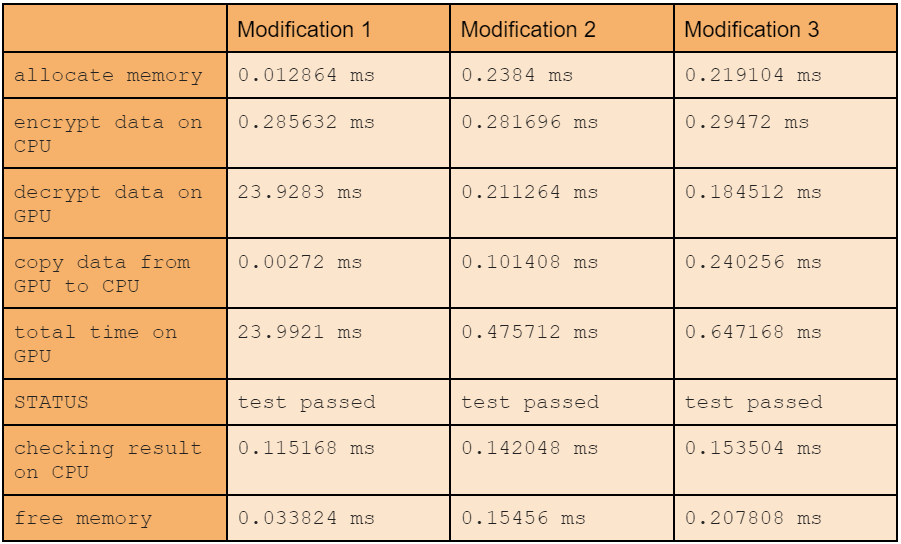

จะเห็นได้ว่าเวลาที่ใช้บน GPU (การทำ decrypt) จะลดลงแบบเห็นได้ชัด